<a href="https://colab.research.google.com/github/beajdkjj/oms-data/blob/main/suicide_data_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import kagglehub
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("kumaranand05/who-suicide-data-1950-2021")
df = pd.read_csv(path+'/combined_processed_data.csv', sep = ',')
print(df.dtypes)

100%|██████████| 2.79M/2.79M [00:00<00:00, 114MB/s]

Extracting files...
Region Name                                                 object
Country Name                                                object
Year                                                         int64
Sex                                                         object
0 Year                                                     float64
1-4 Years                                                  float64
5-9 Years                                                  float64
10-14 Years                                                float64
15-19 Years                                                float64
20-24 Years                                                float64
25-29 Years                                                float64
30-34 Years                                                float64
35-39 Years                                                float64
40-44 Years                                                float64
45-49 Years                               

In [8]:
print(df['No of Suicides'].isnull().sum())

0


In [15]:
#tratamento dos dados
df_mulheres = df[df['Sex'] == 'Female']
df = df[df['Year'] != 2021]
df['No of Suicides'] = df['No of Suicides'].astype(int)
df['No of Suicides'] = df['No of Suicides'].fillna(0).astype(int)
df_por_ano = df_mulheres.groupby('Year')['No of Suicides'].sum().reset_index()


print(df_por_ano);

    Year  No of Suicides
0   1950           14287
1   1951           16250
2   1952           16496
3   1953           17515
4   1954           18687
..   ...             ...
66  2016           50597
67  2017           50218
68  2018           48571
69  2019           46462
70  2020           36444

[71 rows x 2 columns]


In [16]:
treino = df_por_ano[df_por_ano['Year'] <= 2010]
teste = df_por_ano[(df_por_ano['Year'] >= 2010) & (df_por_ano['Year'] <= 2015)]

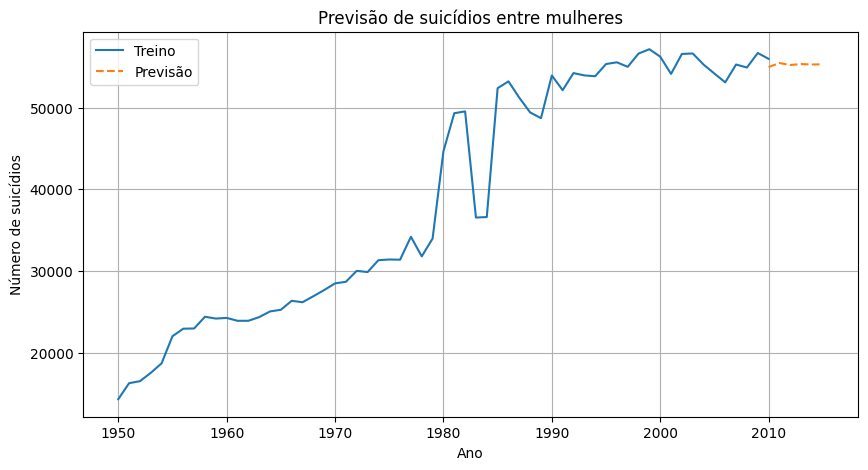

In [18]:
# Modelo ARIMA (p, d, q) — aqui usamos um exemplo simples: (1,1,1)
modelo = ARIMA(treino['No of Suicides'], order=(1,1,1))
modelo_treinado = modelo.fit()

# Fazer predição para os anos de teste
predicoes = modelo_treinado.forecast(steps=len(teste))

# Plotar resultados
plt.figure(figsize=(10,5))
plt.plot(treino['Year'], treino['No of Suicides'], label='Treino')
plt.plot(teste['Year'], predicoes, label='Previsão', linestyle='--')
plt.title('Previsão de suicídios entre mulheres')
plt.xlabel('Ano')
plt.ylabel('Número de suicídios')
plt.legend()
plt.grid(True)
plt.show()

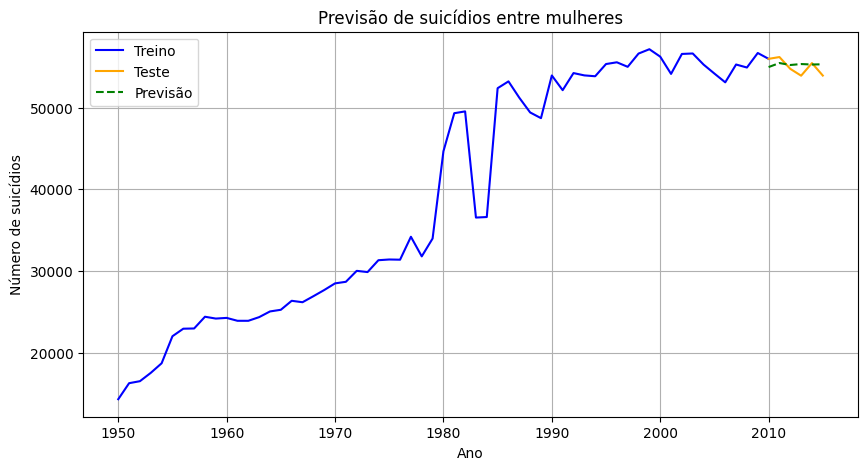

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

# plotar os dados de treino
ax.plot(treino['Year'], treino['No of Suicides'], label='Treino', color='blue')

# plotar os dados de teste
ax.plot(teste['Year'], teste['No of Suicides'], label='Teste', color='orange')

# plotar as previsões (certifique-se que predicoes tem mesmo comprimento do teste)
ax.plot(teste['Year'], predicoes, label='Previsão', color='green', linestyle='--')

ax.set_title('Previsão de suicídios entre mulheres')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de suicídios')
ax.legend()
plt.grid(True)
plt.show()

In [20]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge pmdarima -y

✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1136.950, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1145.643, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1147.361, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1146.717, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1146.288, Time=0.03 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1141.190, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1136.013, Time=0.15 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1149.080, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1135.029, Time=0.13 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1133.811, Time=0.11 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1134.280, Time=0.70 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1135.532, Time=0.06 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1131.795, Time=0.14 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=1129.321, Time=0.13 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1129.675, Time=0.08 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=1130.901, Time=0.23 sec


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1131.270, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1131.969, Time=0.11 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0] intercept
Total fit time: 3.128 seconds


/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


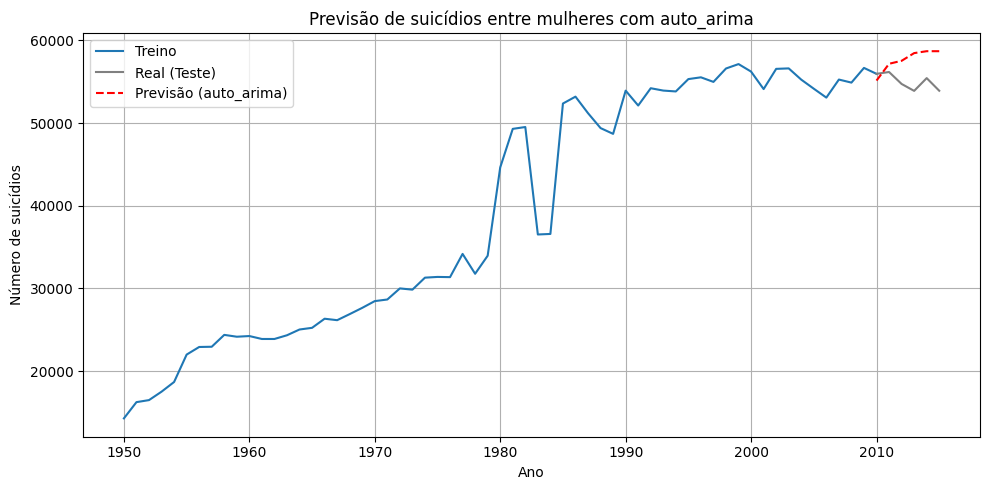

In [22]:
from pmdarima.arima import auto_arima

# Ajustar o modelo usando os dados de treino
modelo = auto_arima(
    treino['No of Suicides'],
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    seasonal=False
)

# Fazer predição
predicoes = modelo.predict(n_periods=len(teste))

plt.figure(figsize=(10, 5))
plt.plot(treino['Year'], treino['No of Suicides'], label='Treino')
plt.plot(teste['Year'], teste['No of Suicides'], label='Real (Teste)', color='gray')
plt.plot(teste['Year'], predicoes, label='Previsão (auto_arima)', linestyle='--', color='red')
plt.title('Previsão de suicídios entre mulheres com auto_arima')
plt.xlabel('Ano')
plt.ylabel('Número de suicídios')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()